<a id="5"></a>


<font color="black" size=+1><b> Classification of Tuberculosis Disease from 2019-2021 using Artificial Neural Network (ANN) </b></font>

<a id="4"></a>

---
<font color="GREEN" size=+1><b>  Kelompok 4 - Data Understanding</b></font>

---
    Nama Anggota
    1. Nadya Dioranta Tambunan        DS04037
    2. Agnes Veronika Sihombing       DS04032
    4. Hanna Dhea Christi Sihombing   DS04043

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## **Data**

### fktpnonkapasitas

In [ ]:
data_fktpnonkapasitas = pd.read_stata('/content/drive/MyDrive/DAMI/TB20152021_fktpnonkapitasi.dta')
data_fktpnonkapasitas.head()

,PSTV01,PSTV02,PSTV15,PNK02,PNK03,PNK04,PNK05,PNK06,PNK07,PNK08,...,PNK10,PNK11,PNK12,PNK13,PNK13A,PNK14,PNK15,PNK16,PNK17,PNK18
0,93858078,93216423,7.659537,183920215Y000376,2015-02-26,2015-02-26,2015-02-27,SULAWESI SELATAN,BARRU,PEMERINTAH KABUPATEN/KOTA,...,RAWAT INAP,RITP,PBI APBN,NaN,,9999,9999,Evakuasi medis / Ambulans Darat,120000,120000
1,93747649,346217457,1.800196,19500915Y000074,2015-09-21,2015-09-23,2015-09-23,KALIMANTAN SELATAN,TAPIN,PEMERINTAH KABUPATEN/KOTA,...,RAWAT INAP,RITP,PBI APBN,NaN,,9999,9999,Rawat Inap di R. Perawatan Biasa,240000,240000
2,359887820,72989971,0.959155,250630919P000299,2019-09-26,2019-09-29,2019-09-29,PAPUA,JAYAPURA,TNI AD,...,KLINIK RAWAT INAP,RITP,PPU,A01 Typhoid and paratyphoid fevers,A01,A010,Typhoid fever,Rawat Inap di R. Perawatan Biasa,600000,600000
3,84126594,84126594,1.110887,326360919P001086,2019-09-09,2019-09-12,2019-09-12,JAWA TENGAH,REMBANG,PEMERINTAH KABUPATEN/KOTA,...,RAWAT INAP,RITP,PBI APBN,A01 Typhoid and paratyphoid fevers,A01,A01,Typhoid and paratyphoid fevers,Rawat Inap di R. Perawatan Biasa,480000,480000
4,87558937,62126532,32.451832,252721019P001142,2019-10-14,2019-10-17,2019-10-17,JAWA TENGAH,KEBUMEN,PEMERINTAH KABUPATEN/KOTA,...,RAWAT INAP,RITP,PBI APBN,A01 Typhoid and paratyphoid fevers,A01,A01,Typhoid and paratyphoid fevers,Rawat Inap di R. Perawatan Biasa,600000,600000


In [ ]:
data_fktpnonkapasitas['PNK09'].describe()

count            36493
unique               6
top       LABORATORIUM
freq             15173
Name: PNK09, dtype: object

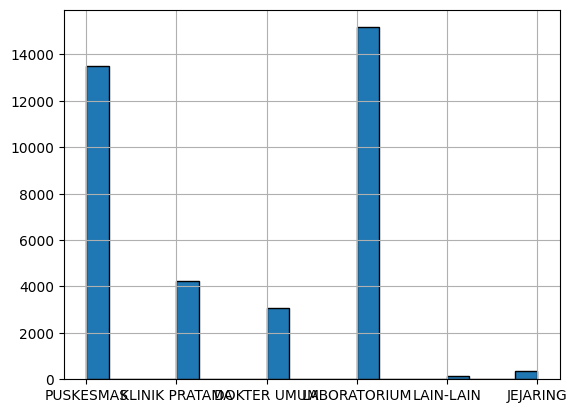

In [ ]:
data_fktpnonkapasitas['PNK09'].hist(edgecolor='black', bins=20);

In [ ]:
data_fktpnonkapasitas.shape

(36493, 21)

In [ ]:
data_fktpnonkapasitas.tail()

,PSTV01,PSTV02,PSTV15,PNK02,PNK03,PNK04,PNK05,PNK06,PNK07,PNK08,...,PNK10,PNK11,PNK12,PNK13,PNK13A,PNK14,PNK15,PNK16,PNK17,PNK18
36488,107435122,107435122,17.946516,108680818Y000770,2018-08-06,2018-08-06,2018-08-06,SULAWESI SELATAN,WAJO,PEMERINTAH KABUPATEN/KOTA,...,RAWAT INAP,RJTP,PBI APBN,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Pemasangan IUD / Implant,100000,100000
36489,447273237,435380768,2.330930,122070319Y000676,2019-03-09,2019-03-09,2019-03-09,JAWA TIMUR,TUBAN,PEMERINTAH KABUPATEN/KOTA,...,RAWAT INAP,RJTP,PBPU,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Pemasangan IUD / Implant,100000,100000
36490,80686271,426470275,1.154869,296600118Y000277,2018-01-20,2018-01-20,2018-01-20,PAPUA BARAT,RAJA AMPAT,PEMERINTAH KABUPATEN/KOTA,...,NON RAWAT INAP,RJTP,PBI APBD,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Suntik,15000,15000
36491,93887676,93887676,3.204735,296600517Y000031,2017-05-03,2017-05-03,2017-05-03,PAPUA BARAT,RAJA AMPAT,PEMERINTAH KABUPATEN/KOTA,...,NON RAWAT INAP,RJTP,PBI APBD,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Suntik,15000,15000
36492,93887676,93887676,3.204735,296600816Y000004,2016-08-01,2016-08-01,2016-08-01,PAPUA BARAT,RAJA AMPAT,PEMERINTAH KABUPATEN/KOTA,...,NON RAWAT INAP,RJTP,PBI APBD,Z97 Presence of other devices,Z97,Z975,Presence of (intrauterine) contraceptive device,Pelayanan KB : Suntik,15000,15000


In [ ]:
data_fktpnonkapasitas.columns

Index(['PSTV01', 'PSTV02', 'PSTV15', 'PNK02', 'PNK03', 'PNK04', 'PNK05',
       'PNK06', 'PNK07', 'PNK08', 'PNK09', 'PNK10', 'PNK11', 'PNK12', 'PNK13',
       'PNK13A', 'PNK14', 'PNK15', 'PNK16', 'PNK17', 'PNK18'],
      dtype='object')

In [ ]:
data_fktpnonkapasitas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36493 entries, 0 to 36492
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PSTV01  36493 non-null  int32         
 1   PSTV02  36493 non-null  int32         
 2   PSTV15  36493 non-null  float32       
 3   PNK02   36493 non-null  object        
 4   PNK03   36493 non-null  datetime64[ns]
 5   PNK04   36493 non-null  datetime64[ns]
 6   PNK05   36493 non-null  datetime64[ns]
 7   PNK06   36493 non-null  category      
 8   PNK07   36493 non-null  category      
 9   PNK08   36493 non-null  category      
 10  PNK09   36493 non-null  category      
 11  PNK10   36493 non-null  category      
 12  PNK11   36493 non-null  category      
 13  PNK12   36493 non-null  category      
 14  PNK13   36491 non-null  category      
 15  PNK13A  36493 non-null  object        
 16  PNK14   36493 non-null  object        
 17  PNK15   36493 non-null  object        
 18  PNK16 

In [ ]:
data_fktpnonkapasitas.dtypes

PSTV01             int32
PSTV02             int32
PSTV15           float32
PNK02             object
PNK03     datetime64[ns]
PNK04     datetime64[ns]
PNK05     datetime64[ns]
PNK06           category
PNK07           category
PNK08           category
PNK09           category
PNK10           category
PNK11           category
PNK12           category
PNK13           category
PNK13A            object
PNK14             object
PNK15             object
PNK16           category
PNK17              int32
PNK18              int32
dtype: object

In [ ]:
data_fktpnonkapasitas.describe()

,PSTV01,PSTV02,PSTV15,PNK17,PNK18
count,3.649300e+04,3.649300e+04,36493.000000,3.649300e+04,3.649300e+04
mean,1.033491e+08,1.259502e+08,10.189317,1.353351e+05,1.353351e+05
std,1.224665e+08,1.390374e+08,21.183065,2.245414e+05,2.245414e+05
min,6.563800e+04,6.893000e+04,0.376170,0.000000e+00,0.000000e+00
25%,3.120950e+07,3.389082e+07,1.516612,2.500000e+04,2.500000e+04
50%,6.113467e+07,6.568918e+07,4.347620,4.500000e+04,4.500000e+04
75%,8.974764e+07,9.855116e+07,10.225730,1.200000e+05,1.200000e+05
max,4.553364e+08,4.553826e+08,324.528839,5.625000e+06,5.625000e+06


In [ ]:
data_fktpnonkapasitas.isnull().sum()

PSTV01    0
PSTV02    0
PSTV15    0
PNK02     0
PNK03     0
PNK04     0
PNK05     0
PNK06     0
PNK07     0
PNK08     0
PNK09     0
PNK10     0
PNK11     0
PNK12     0
PNK13     2
PNK13A    0
PNK14     0
PNK15     0
PNK16     0
PNK17     0
PNK18     0
dtype: int64

In [ ]:
data_fktpnonkapasitas = data_fktpnonkapasitas.duplicated()
data_fktpnonkapasitas.sum()

487

### kepersertaan_2019

In [ ]:
data_kepersertaan2019 = pd.read_stata('/content/drive/MyDrive/DAMI/TB2019_kepesertaan.dta')
data_kepersertaan2019

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,21611150,21611150,1957-09-12,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,ACEH BESAR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BESAR,1.157796,2019,AKTIF,NaN
1,94343049,96772919,1961-12-03,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGGARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGGARA,1.556821,2019,AKTIF,NaN
2,83393824,298548714,2002-10-05,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH TENGGARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGGARA,1.159913,2019,AKTIF,NaN
3,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TAMIANG,9.436164,2019,AKTIF,NaN
4,67805935,67805935,1972-11-13,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TAMIANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TAMIANG,0.899331,2019,AKTIF,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94961,446945417,446945417,1984-12-31,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBPU,NUSA TENGGARA BARAT,LOMBOK BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,NUSA TENGGARA BARAT,LOMBOK BARAT,3.706050,2019,AKTIF,NaN
94962,339605943,286316180,1989-03-17,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBPU,JAWA BARAT,SUKABUMI,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,SUKABUMI,35.093258,2019,TIDAK AKTIF,NaN
94963,292512825,301371045,1979-05-31,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBPU,SUMATERA SELATAN,EMPAT LAWANG,SWASTA,DOKTER UMUM,SUMATERA SELATAN,EMPAT LAWANG,2.652437,2019,AKTIF,NaN
94964,412069355,412069355,1970-02-17,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBPU,SUMATERA UTARA,TAPANULI TENGAH,SWASTA,DOKTER UMUM,SUMATERA UTARA,TAPANULI TENGAH,14.152590,2019,MENINGGAL,2019.0


In [ ]:
data_kepersertaan2019['PSTV12'].describe()

count         94966
unique            3
top       PUSKESMAS
freq          68890
Name: PSTV12, dtype: object

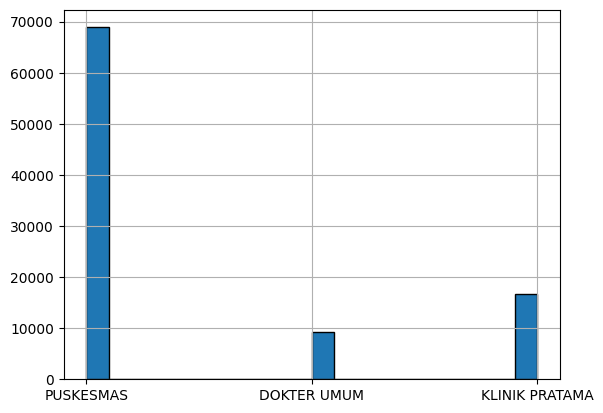

In [ ]:
data_kepersertaan2019['PSTV12'].hist(edgecolor='black', bins=20);

In [ ]:
data_kepersertaan2019.shape

(94966, 18)

In [ ]:
data_kepersertaan2019.tail()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
94961,446945417,446945417,1984-12-31,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBPU,NUSA TENGGARA BARAT,LOMBOK BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,NUSA TENGGARA BARAT,LOMBOK BARAT,3.706050,2019,AKTIF,NaN
94962,339605943,286316180,1989-03-17,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBPU,JAWA BARAT,SUKABUMI,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA BARAT,SUKABUMI,35.093258,2019,TIDAK AKTIF,NaN
94963,292512825,301371045,1979-05-31,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBPU,SUMATERA SELATAN,EMPAT LAWANG,SWASTA,DOKTER UMUM,SUMATERA SELATAN,EMPAT LAWANG,2.652437,2019,AKTIF,NaN
94964,412069355,412069355,1970-02-17,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBPU,SUMATERA UTARA,TAPANULI TENGAH,SWASTA,DOKTER UMUM,SUMATERA UTARA,TAPANULI TENGAH,14.152590,2019,MENINGGAL,2019.0
94965,354440860,354440860,2000-09-23,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS II,PBPU,JAWA TENGAH,PEMALANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,JAWA TENGAH,PEMALANG,1.224500,2019,AKTIF,NaN


In [ ]:
data_kepersertaan2019.columns

Index(['PSTV01', 'PSTV02', 'PSTV03', 'PSTV04', 'PSTV05', 'PSTV06', 'PSTV07',
       'PSTV08', 'PSTV09', 'PSTV10', 'PSTV11', 'PSTV12', 'PSTV13', 'PSTV14',
       'PSTV15', 'PSTV16', 'PSTV17', 'PSTV18'],
      dtype='object')

In [ ]:
data_kepersertaan2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94966 entries, 0 to 94965
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PSTV01  94966 non-null  int32         
 1   PSTV02  94966 non-null  int32         
 2   PSTV03  94966 non-null  datetime64[ns]
 3   PSTV04  94966 non-null  category      
 4   PSTV05  94966 non-null  category      
 5   PSTV06  94966 non-null  category      
 6   PSTV07  94966 non-null  category      
 7   PSTV08  94966 non-null  category      
 8   PSTV09  94966 non-null  category      
 9   PSTV10  94966 non-null  category      
 10  PSTV11  94966 non-null  category      
 11  PSTV12  94966 non-null  category      
 12  PSTV13  94966 non-null  category      
 13  PSTV14  94966 non-null  category      
 14  PSTV15  94966 non-null  float32       
 15  PSTV16  94966 non-null  int16         
 16  PSTV17  94966 non-null  category      
 17  PSTV18  4476 non-null   float64       
dtypes: cat

In [ ]:
data_kepersertaan2019.dtypes

PSTV01             int32
PSTV02             int32
PSTV03    datetime64[ns]
PSTV04          category
PSTV05          category
PSTV06          category
PSTV07          category
PSTV08          category
PSTV09          category
PSTV10          category
PSTV11          category
PSTV12          category
PSTV13          category
PSTV14          category
PSTV15           float32
PSTV16             int16
PSTV17          category
PSTV18           float64
dtype: object

In [ ]:
data_kepersertaan2019.describe()

,PSTV01,PSTV02,PSTV15,PSTV16,PSTV18
count,9.496600e+04,9.496600e+04,94966.000000,94966.0,4476.0
mean,1.830281e+08,1.903269e+08,8.461007,2019.0,2019.0
std,1.597607e+08,1.607588e+08,19.109184,0.0,0.0
min,1.394000e+03,3.687000e+03,0.156804,2019.0,2019.0
25%,4.366800e+07,4.563971e+07,1.154869,2019.0,2019.0
50%,8.745586e+07,9.109761e+07,2.845975,2019.0,2019.0
75%,3.455679e+08,3.518411e+08,7.727345,2019.0,2019.0
max,4.553809e+08,4.553826e+08,365.923492,2019.0,2019.0


In [ ]:
data_kepersertaan2019.isnull().sum()

PSTV01        0
PSTV02        0
PSTV03        0
PSTV04        0
PSTV05        0
PSTV06        0
PSTV07        0
PSTV08        0
PSTV09        0
PSTV10        0
PSTV11        0
PSTV12        0
PSTV13        0
PSTV14        0
PSTV15        0
PSTV16        0
PSTV17        0
PSTV18    90490
dtype: int64

In [ ]:
duplicate_kepersertaan2019 = data_kepersertaan2019.duplicated()
duplicate_kepersertaan2019.sum()

0

### kepersertaan_2020

In [ ]:
data_kepersertaan2020 = pd.read_stata('/content/drive/MyDrive/DAMI/TB2020_kepesertaan.dta')
data_kepersertaan2020.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,32853965,31945523,1958-11-27,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGAH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGAH,1.531137,2020,MENINGGAL,2020.0
1,8555967,8555967,1936-07-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH TENGAH,POLRI,KLINIK PRATAMA,ACEH,BIREUEN,0.998777,2020,AKTIF,NaN
2,8797049,249479,1950-07-21,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH SELATAN,30.096481,2020,TIDAK AKTIF,NaN
3,83472658,54408870,2012-08-12,ANAK,PEREMPUAN,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BARAT,9.837102,2020,AKTIF,NaN
4,425874326,296852327,2004-12-30,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS II,PPU,SUMATERA UTARA,TOBA SAMOSIR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,TOBA SAMOSIR,1.038886,2020,AKTIF,NaN


In [ ]:
data_kepersertaan2020.shape

(94966, 18)

In [ ]:
data_kepersertaan2020.tail()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
94961,441113640,353368323,1968-06-24,ISTRI,PEREMPUAN,KAWIN,KELAS II,PBPU,BENGKULU,KOTA BENGKULU,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,BENGKULU,KOTA BENGKULU,11.074059,2020,MENINGGAL,2019.0
94962,348921684,348921684,1954-03-10,PESERTA,PEREMPUAN,CERAI,KELAS III,PBI APBD,SUMATERA SELATAN,EMPAT LAWANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA SELATAN,EMPAT LAWANG,1.168197,2020,AKTIF,NaN
94963,344293181,392640898,1975-07-07,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBI APBD,RIAU,BENGKALIS,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RIAU,BENGKALIS,1.783689,2020,AKTIF,NaN
94964,411717961,411717961,2010-03-13,PESERTA,LAKI-LAKI,BELUM KAWIN,KELAS III,PBI APBD,PAPUA BARAT,MANOKWARI SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,PAPUA BARAT,MANOKWARI SELATAN,1.025151,2020,AKTIF,NaN
94965,278051593,278051593,1977-05-05,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBPU,SUMATERA UTARA,SERDANG BEDAGAI,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,SERDANG BEDAGAI,14.769157,2020,TIDAK AKTIF,NaN


In [ ]:
data_kepersertaan2020.columns

Index(['PSTV01', 'PSTV02', 'PSTV03', 'PSTV04', 'PSTV05', 'PSTV06', 'PSTV07',
       'PSTV08', 'PSTV09', 'PSTV10', 'PSTV11', 'PSTV12', 'PSTV13', 'PSTV14',
       'PSTV15', 'PSTV16', 'PSTV17', 'PSTV18'],
      dtype='object')

In [ ]:
data_kepersertaan2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94966 entries, 0 to 94965
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PSTV01  94966 non-null  int32         
 1   PSTV02  94966 non-null  int32         
 2   PSTV03  94966 non-null  datetime64[ns]
 3   PSTV04  94966 non-null  category      
 4   PSTV05  94966 non-null  category      
 5   PSTV06  94966 non-null  category      
 6   PSTV07  94966 non-null  category      
 7   PSTV08  94966 non-null  category      
 8   PSTV09  94966 non-null  category      
 9   PSTV10  94966 non-null  category      
 10  PSTV11  94966 non-null  category      
 11  PSTV12  94966 non-null  category      
 12  PSTV13  94966 non-null  category      
 13  PSTV14  94966 non-null  category      
 14  PSTV15  94966 non-null  float32       
 15  PSTV16  94966 non-null  int16         
 16  PSTV17  94966 non-null  category      
 17  PSTV18  7147 non-null   float64       
dtypes: cat

In [ ]:
data_kepersertaan2020.dtypes

PSTV01             int32
PSTV02             int32
PSTV03    datetime64[ns]
PSTV04          category
PSTV05          category
PSTV06          category
PSTV07          category
PSTV08          category
PSTV09          category
PSTV10          category
PSTV11          category
PSTV12          category
PSTV13          category
PSTV14          category
PSTV15           float32
PSTV16             int16
PSTV17          category
PSTV18           float64
dtype: object

In [ ]:
data_kepersertaan2020.describe()

,PSTV01,PSTV02,PSTV15,PSTV16,PSTV18
count,9.496600e+04,9.496600e+04,94966.000000,94966.0,7147.000000
mean,1.830281e+08,1.903269e+08,8.461007,2020.0,2019.370365
std,1.597607e+08,1.607588e+08,19.109184,0.0,0.482936
min,1.394000e+03,3.687000e+03,0.156804,2020.0,2019.000000
25%,4.366800e+07,4.563971e+07,1.154869,2020.0,2019.000000
50%,8.745586e+07,9.109761e+07,2.845975,2020.0,2019.000000
75%,3.455679e+08,3.518411e+08,7.727345,2020.0,2020.000000
max,4.553809e+08,4.553826e+08,365.923492,2020.0,2020.000000


In [ ]:
data_kepersertaan2020.isnull().sum()

PSTV01        0
PSTV02        0
PSTV03        0
PSTV04        0
PSTV05        0
PSTV06        0
PSTV07        0
PSTV08        0
PSTV09        0
PSTV10        0
PSTV11        0
PSTV12        0
PSTV13        0
PSTV14        0
PSTV15        0
PSTV16        0
PSTV17        0
PSTV18    87819
dtype: int64

In [ ]:
duplicate_kepersertaan2020 = data_kepersertaan2020.duplicated()
duplicate_kepersertaan2020.sum()

0

### kepersertaan_2021

In [ ]:
data_kepersertaan2021 = pd.read_stata('/content/drive/MyDrive/DAMI/TB2021_kepesertaan.dta')
data_kepersertaan2021.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,32853965,31945523,1958-11-27,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGAH,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGAH,1.531137,2021,MENINGGAL,2020.0
1,8555967,8555967,1936-07-01,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH TENGAH,POLRI,KLINIK PRATAMA,ACEH,BIREUEN,0.998777,2021,AKTIF,NaN
2,8797049,249479,1950-07-21,SUAMI,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,ACEH,ACEH SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH SELATAN,30.096481,2021,TIDAK AKTIF,NaN
3,83472658,54408870,2012-08-12,ANAK,PEREMPUAN,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH BARAT,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BARAT,9.837102,2021,AKTIF,NaN
4,425874326,296852327,2004-12-30,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS II,PPU,SUMATERA UTARA,TOBA SAMOSIR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,TOBA SAMOSIR,1.038886,2021,AKTIF,NaN


In [ ]:
data_kepersertaan2021.shape

(94966, 18)

In [ ]:
data_kepersertaan2021.tail()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
94961,441113640,353368323,1968-06-24,ISTRI,PEREMPUAN,KAWIN,KELAS II,PBPU,BENGKULU,KOTA BENGKULU,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,BENGKULU,KOTA BENGKULU,11.074059,2021,MENINGGAL,2019.0
94962,348921684,348921684,1954-03-10,PESERTA,PEREMPUAN,CERAI,KELAS III,PBI APBD,SUMATERA SELATAN,EMPAT LAWANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA SELATAN,EMPAT LAWANG,1.168197,2021,AKTIF,NaN
94963,344293181,392640898,1975-07-07,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBI APBD,RIAU,BENGKALIS,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RIAU,BENGKALIS,1.783689,2021,AKTIF,NaN
94964,411717961,411717961,2010-03-13,PESERTA,LAKI-LAKI,BELUM KAWIN,KELAS III,PBI APBD,PAPUA BARAT,MANOKWARI SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,PAPUA BARAT,MANOKWARI SELATAN,1.025151,2021,AKTIF,NaN
94965,278051593,278051593,1977-05-05,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBPU,SUMATERA UTARA,SERDANG BEDAGAI,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA UTARA,SERDANG BEDAGAI,14.769157,2021,TIDAK AKTIF,NaN


In [ ]:
data_kepersertaan2021.columns

Index(['PSTV01', 'PSTV02', 'PSTV03', 'PSTV04', 'PSTV05', 'PSTV06', 'PSTV07',
       'PSTV08', 'PSTV09', 'PSTV10', 'PSTV11', 'PSTV12', 'PSTV13', 'PSTV14',
       'PSTV15', 'PSTV16', 'PSTV17', 'PSTV18'],
      dtype='object')

In [ ]:
data_kepersertaan2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94966 entries, 0 to 94965
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PSTV01  94966 non-null  int32         
 1   PSTV02  94966 non-null  int32         
 2   PSTV03  94966 non-null  datetime64[ns]
 3   PSTV04  94966 non-null  category      
 4   PSTV05  94966 non-null  category      
 5   PSTV06  94966 non-null  category      
 6   PSTV07  94966 non-null  category      
 7   PSTV08  94966 non-null  category      
 8   PSTV09  94966 non-null  category      
 9   PSTV10  94966 non-null  category      
 10  PSTV11  94966 non-null  category      
 11  PSTV12  94966 non-null  category      
 12  PSTV13  94966 non-null  category      
 13  PSTV14  94966 non-null  category      
 14  PSTV15  94966 non-null  float32       
 15  PSTV16  94966 non-null  int16         
 16  PSTV17  94966 non-null  category      
 17  PSTV18  8654 non-null   float64       
dtypes: cat

In [ ]:
data_kepersertaan2021.dtypes

PSTV01             int32
PSTV02             int32
PSTV03    datetime64[ns]
PSTV04          category
PSTV05          category
PSTV06          category
PSTV07          category
PSTV08          category
PSTV09          category
PSTV10          category
PSTV11          category
PSTV12          category
PSTV13          category
PSTV14          category
PSTV15           float32
PSTV16             int16
PSTV17          category
PSTV18           float64
dtype: object

In [ ]:
data_kepersertaan2021.describe()

,PSTV01,PSTV02,PSTV15,PSTV16,PSTV18
count,9.496600e+04,9.496600e+04,94966.000000,94966.0,8654.000000
mean,1.830281e+08,1.903269e+08,8.461007,2021.0,2019.656344
std,1.597607e+08,1.607588e+08,19.109184,0.0,0.759391
min,1.394000e+03,3.687000e+03,0.156804,2021.0,2019.000000
25%,4.366800e+07,4.563971e+07,1.154869,2021.0,2019.000000
50%,8.745586e+07,9.109761e+07,2.845975,2021.0,2019.000000
75%,3.455679e+08,3.518411e+08,7.727345,2021.0,2020.000000
max,4.553809e+08,4.553826e+08,365.923492,2021.0,2021.000000


In [ ]:
data_kepersertaan2021.isnull().sum()

PSTV01        0
PSTV02        0
PSTV03        0
PSTV04        0
PSTV05        0
PSTV06        0
PSTV07        0
PSTV08        0
PSTV09        0
PSTV10        0
PSTV11        0
PSTV12        0
PSTV13        0
PSTV14        0
PSTV15        0
PSTV16        0
PSTV17        0
PSTV18    86312
dtype: int64

In [ ]:
duplicate_kepersertaan2021 = data_kepersertaan2021.duplicated()
duplicate_kepersertaan2021.sum()

0

metadata 2022

In [ ]:
data_2022 = pd.read_excel('/content/drive/MyDrive/DAMI/2022 Metadata Data Sampel BPJS Kesehatan.xlsx')
data_2022

,Variable Information,Unnamed: 1,Unnamed: 2
0,Variable,Position,Label
1,PSTV01,1,Nomor peserta
2,PSTV02,2,Nomor keluarga
3,PSTV03,3,Tanggal lahir peserta
4,PSTV04,4,Hubungan Keluarga
...,...,...,...
145,NaN,18,Usia >90 tahun
146,NaN,19,Usia veteran >85 tahun
147,NaN,20,Berada di luar negeri
148,NaN,21,Non aktif oleh pusat


### Data Integration

In [ ]:
m1 = [data_kepersertaan2019, data_kepersertaan2020, data_kepersertaan2021]

In [ ]:
data_merge = pd.concat(m1)
data_merge

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18
0,21611150,21611150,1957-09-12,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,ACEH BESAR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BESAR,1.157796,2019,AKTIF,NaN
1,94343049,96772919,1961-12-03,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGGARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGGARA,1.556821,2019,AKTIF,NaN
2,83393824,298548714,2002-10-05,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH TENGGARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGGARA,1.159913,2019,AKTIF,NaN
3,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TAMIANG,9.436164,2019,AKTIF,NaN
4,67805935,67805935,1972-11-13,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TAMIANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TAMIANG,0.899331,2019,AKTIF,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94961,441113640,353368323,1968-06-24,ISTRI,PEREMPUAN,KAWIN,KELAS II,PBPU,BENGKULU,KOTA BENGKULU,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,BENGKULU,KOTA BENGKULU,11.074059,2021,MENINGGAL,2019.0
94962,348921684,348921684,1954-03-10,PESERTA,PEREMPUAN,CERAI,KELAS III,PBI APBD,SUMATERA SELATAN,EMPAT LAWANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,SUMATERA SELATAN,EMPAT LAWANG,1.168197,2021,AKTIF,NaN
94963,344293181,392640898,1975-07-07,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBI APBD,RIAU,BENGKALIS,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,RIAU,BENGKALIS,1.783689,2021,AKTIF,NaN
94964,411717961,411717961,2010-03-13,PESERTA,LAKI-LAKI,BELUM KAWIN,KELAS III,PBI APBD,PAPUA BARAT,MANOKWARI SELATAN,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,PAPUA BARAT,MANOKWARI SELATAN,1.025151,2021,AKTIF,NaN


In [ ]:
result_merge = pd.merge(data_merge, data_fktpnonkapasitas, on=['PSTV01', 'PSTV02', 'PSTV15'], how='inner')

In [ ]:
result_merge

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,...,PNK10,PNK11,PNK12,PNK13,PNK13A,PNK14,PNK15,PNK16,PNK17,PNK18
0,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,...,RAWAT INAP,RITP,PBI APBD,O80 Single spontaneous delivery,O80,O800,Spontaneous vertex delivery,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
1,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,...,RAWAT INAP,RITP,PBI APBD,O80 Single spontaneous delivery,O80,O800,Spontaneous vertex delivery,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
2,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,...,RAWAT INAP,RITP,PBI APBD,O80 Single spontaneous delivery,O80,O800,Spontaneous vertex delivery,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
3,75453396,75453396,1959-08-25,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,JAWA TENGAH,BLORA,...,RAWAT INAP,RJTP,BUKAN PEKERJA,R06 Abnormalities of breathing,R06,R060,Dyspnoea,Evakuasi medis / Ambulans Darat,161700,161700
4,75453396,75453396,1959-08-25,PESERTA,LAKI-LAKI,KAWIN,KELAS I,BUKAN PEKERJA,JAWA TENGAH,BLORA,...,RAWAT INAP,RJTP,BUKAN PEKERJA,R06 Abnormalities of breathing,R06,R060,Dyspnoea,Evakuasi medis / Ambulans Darat,161700,161700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109474,426032113,408166141,1982-09-10,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBI APBN,SULAWESI SELATAN,TAKALAR,...,NON RAWAT INAP,RITP,PBI APBN,R19 Other symptoms and signs involving the dig...,R19,R198,Other specified symptoms and signs involving t...,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
109475,426032113,408166141,1982-09-10,ISTRI,PEREMPUAN,KAWIN,KELAS III,PBI APBN,SULAWESI SELATAN,TAKALAR,...,NON RAWAT INAP,RITP,PBI APBN,R19 Other symptoms and signs involving the dig...,R19,R198,Other specified symptoms and signs involving t...,Paket Persalinan per Vaginam normal (oleh Bidan),700000,700000
109476,402406574,402406574,1959-09-09,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBPU,NUSA TENGGARA BARAT,SUMBAWA,...,RAWAT INAP,RJTP,PBI APBN,K29 Gastritis and duodenitis,K29,K297,"Gastritis, unspecified",Evakuasi medis / Ambulans Darat,80000,80000
109477,402406574,402406574,1959-09-09,PESERTA,LAKI-LAKI,KAWIN,KELAS III,PBI APBN,NUSA TENGGARA BARAT,SUMBAWA,...,RAWAT INAP,RJTP,PBI APBN,K29 Gastritis and duodenitis,K29,K297,"Gastritis, unspecified",Evakuasi medis / Ambulans Darat,80000,80000


In [ ]:
result_merge.to_csv('data_merge_new.csv', index=False)

In [ ]:
result_merge.isnull().sum()

PSTV01         0
PSTV02         0
PSTV03         0
PSTV04         0
PSTV05         0
PSTV06         0
PSTV07         0
PSTV08         0
PSTV09         0
PSTV10         0
PSTV11         0
PSTV12         0
PSTV13         0
PSTV14         0
PSTV15         0
PSTV16         0
PSTV17         0
PSTV18    102036
PNK02          0
PNK03          0
PNK04          0
PNK05          0
PNK06          0
PNK07          0
PNK08          0
PNK09          0
PNK10          0
PNK11          0
PNK12          0
PNK13          6
PNK13A         0
PNK14          0
PNK15          0
PNK16          0
PNK17          0
PNK18          0
dtype: int64

In [ ]:
result_merge.duplicated().sum()

1461

## Correlation

In [ ]:
!pip install matplotlib seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr, spearmanr

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284898 entries, 0 to 94965
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   PSTV01  284898 non-null  int32         
 1   PSTV02  284898 non-null  int32         
 2   PSTV03  284898 non-null  datetime64[ns]
 3   PSTV04  284898 non-null  category      
 4   PSTV05  284898 non-null  category      
 5   PSTV06  284898 non-null  category      
 6   PSTV07  284898 non-null  object        
 7   PSTV08  284898 non-null  object        
 8   PSTV09  284898 non-null  category      
 9   PSTV10  284898 non-null  category      
 10  PSTV11  284898 non-null  category      
 11  PSTV12  284898 non-null  category      
 12  PSTV13  284898 non-null  category      
 13  PSTV14  284898 non-null  category      
 14  PSTV15  284898 non-null  float32       
 15  PSTV16  284898 non-null  int16         
 16  PSTV17  284898 non-null  object        
 17  PSTV18  20277 non-null   float

In [ ]:
result_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109479 entries, 0 to 109478
Data columns (total 36 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   PSTV01  109479 non-null  int32         
 1   PSTV02  109479 non-null  int32         
 2   PSTV03  109479 non-null  datetime64[ns]
 3   PSTV04  109479 non-null  category      
 4   PSTV05  109479 non-null  category      
 5   PSTV06  109479 non-null  category      
 6   PSTV07  109479 non-null  object        
 7   PSTV08  109479 non-null  object        
 8   PSTV09  109479 non-null  category      
 9   PSTV10  109479 non-null  category      
 10  PSTV11  109479 non-null  category      
 11  PSTV12  109479 non-null  category      
 12  PSTV13  109479 non-null  category      
 13  PSTV14  109479 non-null  category      
 14  PSTV15  109479 non-null  float32       
 15  PSTV16  109479 non-null  int16         
 16  PSTV17  109479 non-null  object        
 17  PSTV18  7443 non-null    floa

In [ ]:
result_merge['PSTV04'] = LE.fit_transform(result_merge['PSTV04'])
result_merge['PSTV05'] = LE.fit_transform(result_merge['PSTV05'])
result_merge['PSTV06'] = LE.fit_transform(result_merge['PSTV06'])
result_merge['PSTV07'] = LE.fit_transform(result_merge['PSTV07'])
result_merge['PSTV08'] = LE.fit_transform(result_merge['PSTV08'])
result_merge['PSTV09'] = LE.fit_transform(result_merge['PSTV09'])
result_merge['PSTV10'] = LE.fit_transform(result_merge['PSTV10'])
result_merge['PSTV11'] = LE.fit_transform(result_merge['PSTV11'])
result_merge['PSTV12'] = LE.fit_transform(result_merge['PSTV12'])
result_merge['PSTV13'] = LE.fit_transform(result_merge['PSTV13'])
result_merge['PSTV14'] = LE.fit_transform(result_merge['PSTV14'])
result_merge['PNK02'] = LE.fit_transform(result_merge['PNK02'])
result_merge['PNK06'] = LE.fit_transform(result_merge['PNK06'])
result_merge['PNK07'] = LE.fit_transform(result_merge['PNK07'])
result_merge['PNK08'] = LE.fit_transform(result_merge['PNK08'])
result_merge['PNK09'] = LE.fit_transform(result_merge['PNK09'])
result_merge['PNK10'] = LE.fit_transform(result_merge['PNK10'])
result_merge['PNK11'] = LE.fit_transform(result_merge['PNK11'])
result_merge['PNK12'] = LE.fit_transform(result_merge['PNK12'])
result_merge['PNK13'] = LE.fit_transform(result_merge['PNK13'])
result_merge['PNK14'] = LE.fit_transform(result_merge['PNK14'])
result_merge['PNK15'] = LE.fit_transform(result_merge['PNK15'])
result_merge['PNK16'] = LE.fit_transform(result_merge['PNK16'])

In [ ]:
result_merge

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,...,PNK10,PNK11,PNK12,PNK13,PNK13A,PNK14,PNK15,PNK16,PNK17,PNK18
0,328537885,328537885,1989-07-13,2,1,0,2,1,0,6,...,7,1,1,388,O80,813,951,16,700000,700000
1,328537885,328537885,1989-07-13,2,1,0,2,1,0,6,...,7,1,1,388,O80,813,951,16,700000,700000
2,328537885,328537885,1989-07-13,2,1,2,2,1,0,6,...,7,1,1,388,O80,813,951,16,700000,700000
3,75453396,75453396,1959-08-25,2,0,2,0,4,9,56,...,7,2,0,424,R06,874,272,1,161700,161700
4,75453396,75453396,1959-08-25,2,0,2,0,0,9,56,...,7,2,0,424,R06,874,272,1,161700,161700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109474,426032113,408166141,1982-09-10,1,1,2,2,2,27,448,...,5,1,2,434,R19,895,749,16,700000,700000
109475,426032113,408166141,1982-09-10,1,1,2,2,2,27,448,...,5,1,2,434,R19,895,749,16,700000,700000
109476,402406574,402406574,1959-09-09,2,0,2,2,3,21,441,...,7,2,2,247,K29,508,340,1,80000,80000
109477,402406574,402406574,1959-09-09,2,0,2,2,2,21,441,...,7,2,2,247,K29,508,340,1,80000,80000


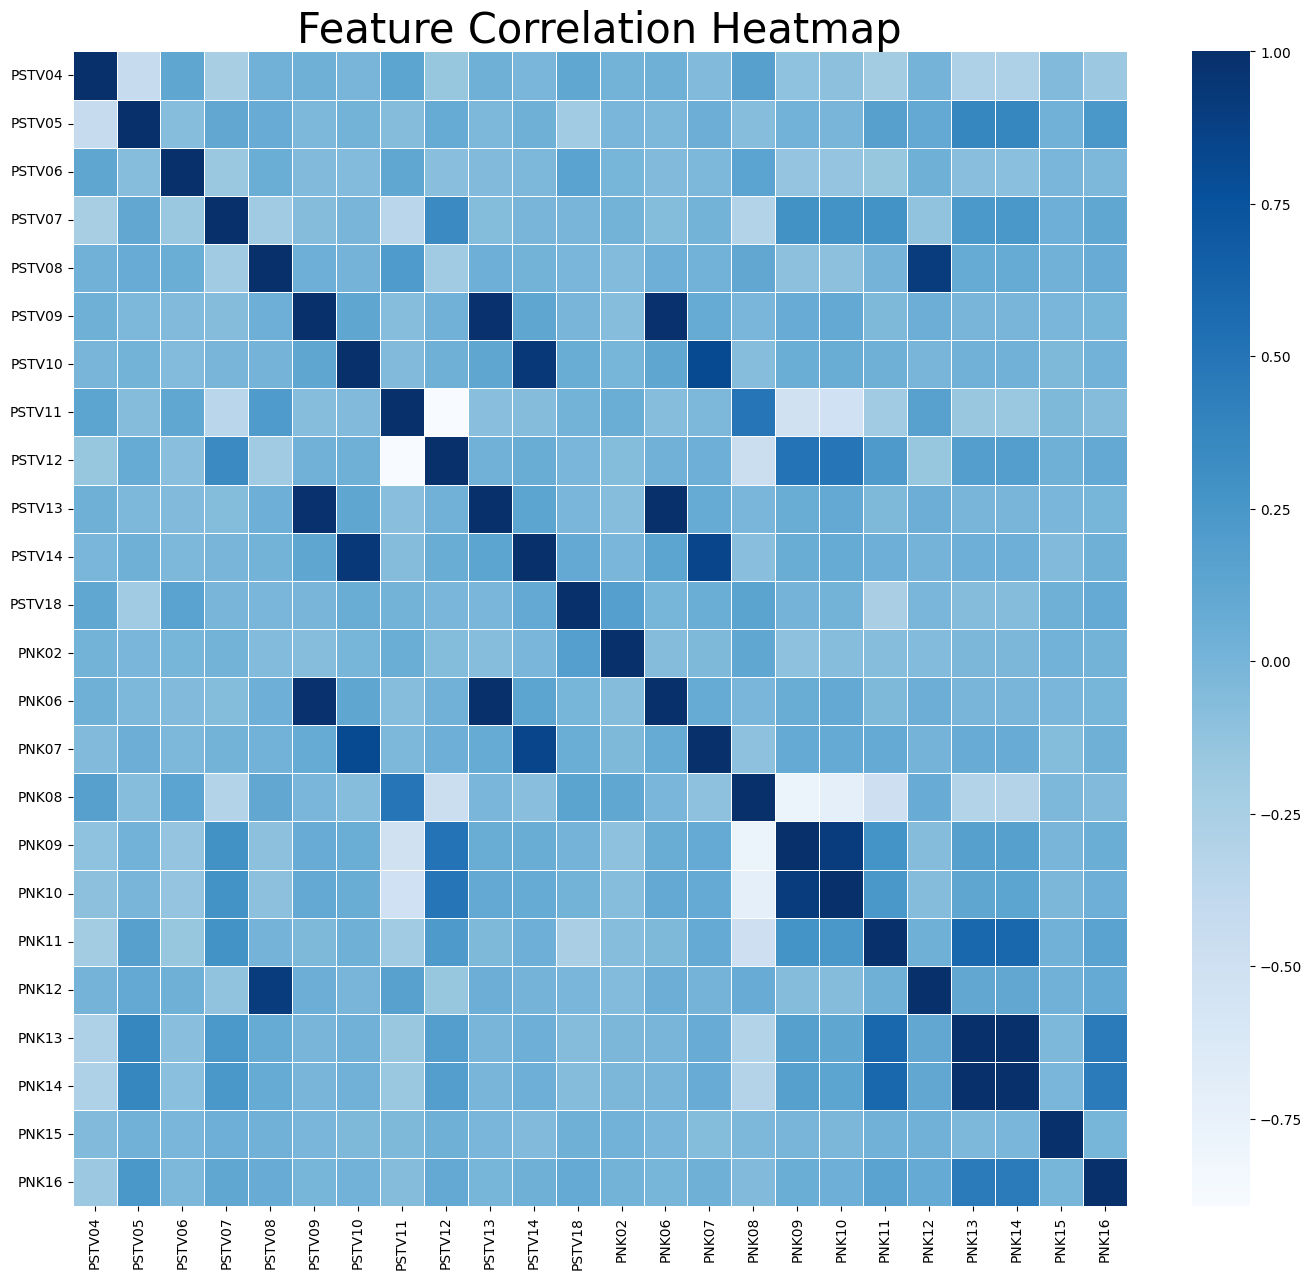

In [ ]:
numeric_df = result_merge.select_dtypes(include=['float64', 'int64'])

# correlation matrix
correlation_matrix = numeric_df.corr()

# heatmap show the correlation between features
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='Blues', linewidths=.5)

plt.title('Feature Correlation Heatmap', fontsize=30)

plt.show()